In [70]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
window = 5

In [71]:
def search_start_date(year, month, date):
    if year % 4 !=0:
        month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_date = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if date >= window + 1:
        start_year = year
        start_month = month
        start_date = date - window
    else:
        if month == 1:
            start_year = year - 1
            start_month = 12
            start_date = 31 - date - window
        else:
            start_year = year
            start_month = month - 1
            start_date = month_date[month - 1] - date - window
    return [start_year, start_month, start_date]


In [72]:
def search_end_date(year, month, date):
    if year % 4 !=0:
        month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_date = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if date + window <= month_date[month]:
        end_year = year
        end_month = month
        end_date = date + window
    else:
        if month == 12:
            end_year = year + 1
            end_month = 1
            end_date = date + window - 31
        else:
            end_year = year
            end_month = month + 1
            end_date = date + window - month_date[month + 1]
    return [end_year, end_month, end_date]

In [73]:
def average_31_days_MFBS(year, month, date):
    if year % 4 != 0:
        month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_date = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    startdate = search_start_date(year, month, date)
    enddate = search_end_date(year, month, date)
    #print(startdate)
    #print(enddate)

    output_MFBS_image = np.zeros((765, 700))
    output_RT_image = np.zeros((765, 700))
    output_image = np.zeros((765, 700))

    start_year = startdate[0]
    start_month = startdate[1]
    start_date = startdate[2]
    end_year = enddate[0]
    end_month = enddate[1]
    end_date = enddate[2]

    if start_month != end_month:
        for date in range(start_date, month_date[start_month] + 1):
            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
            for hour in range(0, 24):
                if hour < 10:
                    hr = "0" + str(hour)
                else:
                    hr = str(hour)
                for minute in range(0, 60, 5):
                    if minute < 10:
                        mnt = "0" + str(minute)
                    else:
                        mnt = str(minute)

                    #open MFBS file
                    filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(start_year - 1) + "1231T235500_" + str(start_year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(start_year) + "/" + str(start_month) + "/" + \
                    "RAD_NL25_RAC_MFBS_EM_5min_" + str(start_year) + str(start_month) + dt + hr + mnt + "_NL.h5"
                    print(filename_MFBS)
                    f = h5py.File(filename_MFBS)['image1']['image_data']
                    f = np.array(list(f))
                    f = f / 100
                    f = f * 12
                    #open RT file
                    filename_RT = "F://" + str(start_year) + "/" + str(start_month) + "/" +"RAD_NL25_RAP_5min_" + str(start_year) + str(start_month) + dt + hr + mnt + ".h5"
                    print(filename_RT)
                    f1 = h5py.File(filename_RT)['image1']['image_data']
                    f1 = np.array(list(f1))
                    f1 = f1 / 100
                    f1 = f1 * 12

                    for x in range(0, 765):
                        for y in range(0, 700):
                            if (f[x][y] < 5000) and (f1[x][y] < 5000):
                                output_MFBS_image[x][y] = output_MFBS_image[x][y] + f[x][y]
                                output_RT_image[x][y] = output_MFBS_image[x][y] + f1[x][y]
        for date in range(1, end_date + 1):
            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
            for hour in range(0, 24):
                if hour < 10:
                    hr = "0" + str(hour)
                else:
                    hr = str(hour)
                for minute in range(0, 60, 5):
                    if minute < 10:
                        mnt = "0" + str(minute)
                    else:
                        mnt = str(minute)
                    filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(end_year - 1) + "1231T235500_" + str(end_year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(end_year) + "/" + str(end_month) + "/" + \
                    "RAD_NL25_RAC_MFBS_EM_5min_" + str(end_year) + str(end_month) + dt + hr + mnt + "_NL.h5"
                    print(filename_MFBS)
                    f = h5py.File(filename_MFBS)['image1']['image_data']
                    f = np.array(list(f))
                    f = f / 100
                    f = f * 12
                    #open RT file
                    filename_RT = "F://" + str(start_year) + "/" + str(start_month) + "/" +"RAD_NL25_RAP_5min_" + str(start_year) + str(start_month) + dt + hr + mnt + ".h5"
                    print(filename_RT)
                    f1 = h5py.File(filename_RT)['image1']['image_data']
                    f1 = np.array(list(f1))
                    f1 = f1 / 100
                    f1 = f1 * 12

                    for x in range(0, 765):
                        for y in range(0, 700):
                            if (f[x][y] < 5000) and (f1[x][y] < 5000):
                                output_MFBS_image[x][y] = output_MFBS_image[x][y] + f[x][y]
                                output_RT_image[x][y] = output_MFBS_image[x][y] + f1[x][y]

    else:
        for date in range(start_date, end_date + 1):
            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
            for hour in range(0, 24):
                if hour < 10:
                    hr = "0" + str(hour)
                else:
                    hr = str(hour)
                for minute in range(0, 60, 5):
                    if minute < 10:
                        mnt = "0" + str(minute)
                    else:
                        mnt = str(minute)

                    # open MFBS file
                    filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(start_year - 1) + "1231T235500_" + str(start_year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(start_year) + "/" + str(start_month) + "/" + \
                    "RAD_NL25_RAC_MFBS_EM_5min_" + str(start_year) + str(start_month) + dt + hr + mnt + "_NL.h5"
                    print(filename_MFBS)
                    f = h5py.File(filename_MFBS)['image1']['image_data']
                    f = np.array(list(f))
                    f = f / 100
                    f = f * 12
                    # open RT file
                    filename_RT = "F://" + str(start_year) + "/" + str(start_month) + "/" + "RAD_NL25_RAP_5min_" + str(start_year) + str(start_month) + dt + hr + mnt + ".h5"
                    print(filename_RT)
                    f1 = h5py.File(filename_RT)['image1']['image_data']
                    f1 = np.array(list(f1))
                    f1 = f1 / 100
                    f1 = f1 * 12

                    for x in range(0, 765):
                        for y in range(0, 700):
                            if (f[x][y] < 5000) and (f1[x][y] < 5000):
                                output_MFBS_image[x][y] = output_MFBS_image[x][y] + f[x][y]
                                output_RT_image[x][y] = output_MFBS_image[x][y] + f1[x][y]

    for x in range(0, 765):
        for y in range(700):
            if (output_MFBS_image[x][y] != 0) and (output_RT_image[x][y] !=0):
                output_image[x][y] = output_MFBS_image[x][y] / output_RT_image[x][y]
            else:
                output_image[x][y] = 0


    return output_image


In [74]:
MSE = 0
MSE1 = 0
i = 0
file_name_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310222230_NL.h5"
f = h5py.File(file_name_MFBS)['image1']['image_data']
f = np.array(list(f))
f = f / 100
f = f * 12
file_name_RT = "F:/2013/10/RAD_NL25_RAP_5min_201310222230.h5"
f1 = h5py.File(file_name_RT)['image1']['image_data']
f1 = np.array(list(f1))
f1 = f1 / 100
f1 = f1 * 12

for x in range(0, 765):
    for y in range(0, 700):
        if (f[x][y] < 5000) and (f1[x][y] < 5000):
            MSE = MSE + (f[x][y]-f1[x][y])*(f[x][y]-f1[x][y])
            i = i + 1
MSE = MSE/i
print(str(i))
print("Original MSE is:" + str(MSE))

C:\Users\zywang\AppData\Local\Temp/ipykernel_109964/219950508.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(file_name_MFBS)['image1']['image_data']
C:\Users\zywang\AppData\Local\Temp/ipykernel_109964/219950508.py:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5py.File(file_name_RT)['image1']['image_data']


55739
Original MSE is:1.6260715405730957


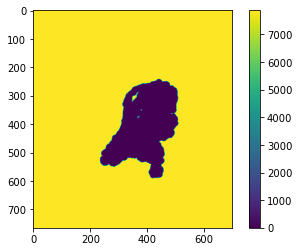

In [75]:
plt.imshow(f)
plt.colorbar()
plt.show()

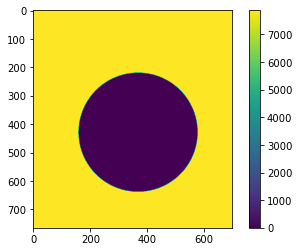

In [77]:
plt.imshow(f1)
plt.colorbar()
plt.show()

In [ ]:
output_image = average_31_days_MFBS(2013, 10, 22)
plt.imshow(output_image)
plt.colorbar()
plt.show()

E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310170000_NL.h5


C:\Users\zywang\AppData\Local\Temp/ipykernel_109964/3727566062.py:118: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename_MFBS)['image1']['image_data']


F://2013/10/RAD_NL25_RAP_5min_201310170000.h5


C:\Users\zywang\AppData\Local\Temp/ipykernel_109964/3727566062.py:125: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5py.File(filename_RT)['image1']['image_data']


E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310170005_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310170005.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310170010_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310170010.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310170015_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310170015.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310170020_NL.h5
F://2013/10/RAD_NL25_RAP_5min_201310170020.h5
E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_20121231T235500_20131231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/2013/10/RAD_NL25_RAC_MFBS_EM_5min_201310170025_NL.h5
F

In [ ]:
processed_image = np.zeros((765, 700))
for x in range(0, 765):
    for y in range(0, 700):
        if(f1[x][y] < 5000):
            processed_image[x][y] = f1[x][y] * output_image[x][y]
plt.imshow(processed_image)
plt.colorbar()
plt.show()

In [ ]:
i = 0
for x in range(0, 765):
    for y in range(0, 700):
        if (f[x][y] < 5000) and (processed_image[x][y] < 5000):
            MSE1 = MSE1 + (f[x][y] - processed_image[x][y])*(f[x][y] - processed_image[x][y])
            i = i + 1
MSE1 = MSE1/i
print("After CARROTS, the MSE is:" + str(MSE1))